<a href="https://colab.research.google.com/github/DaniChinwendu/COMPUTATIONAL-CHEMISTRY-CHEMINFORMATICS/blob/main/Tanimoto_similarity_Chemical_identifier_resolver(SMILES_TO_CID)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io

In [ ]:
pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pubchempy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw,AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Fragments
from rdkit import DataStructs
from rdkit.DataManip.Metric import GetTanimotoDistMat
from rdkit.DataManip.Metric import GetTanimotoSimMat

In [ ]:
import pubchempy as pcp
from pubchempy import get_compounds, Compound

In [ ]:

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()
import pandas as pd

Saving Tanimoto similarity for merged data(non duplicates) (1).xlsx to Tanimoto similarity for merged data(non duplicates) (1) (2).xlsx


In [ ]:

#importing the LLNA sensitizing data set
df1=pd.read_excel(io.BytesIO(uploaded['Tanimoto similarity for merged data(non duplicates) (1).xlsx']))

In [ ]:
df1.tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Substance Name,Name type,Number,Number type,Member of Category,Substance Link,Participant,Participant Link,Section,Endpoint Link,Values,Smiles_name
1239,1348.0,1034.0,1279.0,N-butylbenzenesulfonamide,IUPAC Name,3622-84-2,CAS Number,False,NaN,ECHA REACH,NaN,Skin sensitisation,NaN,Type of information:experimental study\nReliab...,CCCCN[S](=O)(=O)c1ccccc1
1240,1349.0,1035.0,1280.0,unnamed [3709-71-5],NaN,3709-71-5,CAS Number,False,NaN,ECHA REACH,NaN,Skin sensitisation,NaN,Type of information:experimental study\nReliab...,C(=C(/C(F)(F)F)\F)(\C(C(F)(F)F)(C(F)(F)F)F)/F
1241,1350.0,1036.0,1281.0,2-(4-{2-[4-(2-hydroxyethoxy)phenyl]propan-2-yl...,IUPAC Name,901-44-0,CAS Number,False,NaN,ECHA REACH,NaN,Skin sensitisation,NaN,Type of information:experimental study\nReliab...,CC(C)(c1ccc(OCCO)cc1)c2ccc(OCCO)cc2
1242,1351.0,1037.0,1282.0,sodium hydroxysilanoylolate,IUPAC Name,1344-09-8,CAS Number,True,NaN,ECHA REACH,NaN,Skin sensitisation,NaN,Type of information:experimental study\nReliab...,O.O.O.O.O.[Na+].[Na+].[O-][Si]([O-])=O
1243,1352.0,1038.0,1283.0,unnamed [147-14-8],NaN,147-14-8,CAS Number,True,NaN,ECHA REACH,NaN,Skin sensitisation,NaN,Type of information:experimental study\nReliab...,[Cu]1N2C3=NC4=NC(=Nc5n1c(N=C6N=C(N=C2c7ccccc37...


In [ ]:
Smiles=df1['Smiles_name']
Smiles_list=list(Smiles)
len(Smiles_list)

1244

In [ ]:
#generating pubchem cid
cid_list=[]
for i in Smiles_list:
    try:
        Cid=get_compounds(i, 'smiles')
        cid_list.append(Cid)
    except:
        print('INVALID SMILES',i)
print()

INVALID SMILES ..
INVALID SMILES CCCCCCCCCCCCCCCCCC(CC)C1=CC=C(C=C1)S(=O)(=O)[O-].CCCCCCCCCCCCCCCCCC(CC)C1=CC=C(C=C1)S(=O)(=O)[O-].[Ca+2]  
INVALID SMILES not found
INVALID SMILES CCCCCCCCN=[B](Cl)(Cl)[Cl](C)C
INVALID SMILES ..
INVALID SMILES C(C(=O)[O-])C(CC(=O)[O-])(C(=O)[O-])O.[Co+2]  
INVALID SMILES O=[Cr](=O)(O[Si](c1ccccc1)(c2ccccc2)c3ccccc3)O[Si](c4ccccc4)(c5ccccc5)c6ccccc6
INVALID SMILES C/C(=C/C(=O)C)/O.C/C(=C/C(=O)C)/O.[Pd]  
INVALID SMILES ..
INVALID SMILES [C] 
INVALID SMILES  *
INVALID SMILES ..
INVALID SMILES ..
INVALID SMILES [BiH6+3].OC(CC([O-])=O)(CC([O-])=O)C([O-])=O
INVALID SMILES [OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[O--].[BiH6+3].[BiH6+3].[BiH6+3].[BiH6+3].[BiH6+3].[O-][N+]([O-])=O.[O-][N+]([O-])=O.[O-][N+]([O-])=O.[O-][N+]([O-])=O
INVALID SMILES *
INVALID SMILES [Li+].CC(C)CCCCCCCCCCCCCCC(=O)[O-]  
INVALID SMILES F[Zn-](F)F.[K+]  
INVALID SMILES [BiH6+3].CCCCC(CC)C([O-])=O.CCCCC(CC)C([O-])=O.CCCCC(CC)C([O-])=O
INVALID SMILES [BiH6+3].[BiH6+3].[S-]

In [ ]:
cid_list=[]

In [ ]:

#A function that converts SMILES to pubchem CID
def smile_to_cid(i):
    try:
        Cid=get_compounds(i, 'smiles')
        return Cid
    except:
        return 'Not Avaliable'
for i in Smiles_list:
    cid=smile_to_cid(i)
    cid_list.append(cid)

In [ ]:

#Merging the Cid dataframe into the main dataframe
K=cid_list
C= pd.DataFrame(K)
J=C[0]
df1['CID']=J

In [ ]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Substance Name,Name type,Number,Number type,Member of Category,Substance Link,Participant,Participant Link,Section,Endpoint Link,Values,Smiles_name,CID
0,0.0,0.0,0.0,"1,2-bis(3-methylbutyl) benzene-1,2-dicarboxylate",IUPAC Name,605-50-5,CAS Number,False,https://echa.europa.eu/registration-dossier/-/...,ECHA REACH,https://echa.europa.eu/information-on-chemical...,Skin sensitisation,https://echa.europa.eu/registration-dossier/-/...,NaN,CC(C)CCOC(=O)c1ccccc1C(=O)OCCC(C)C,Compound(69059)
1,1.0,1.0,1.0,"2-methyl-2,3-dihydro-1,2-thiazol-3-one",IUPAC Name,2682-20-4,CAS Number,False,https://echa.europa.eu/registration-dossier/-/...,ECHA REACH,https://echa.europa.eu/information-on-chemical...,Skin sensitisation,https://echa.europa.eu/registration-dossier/-/...,NaN,CN1SC=CC1=O,Compound(39800)
2,4.0,4.0,4.0,tetrachloroethene,IUPAC Name,127-18-4,CAS Number,False,https://echa.europa.eu/registration-dossier/-/...,ECHA REACH,https://echa.europa.eu/information-on-chemical...,Skin sensitisation,https://echa.europa.eu/registration-dossier/-/...,NaN,ClC(Cl)=C(Cl)Cl,Compound(31373)
3,5.0,5.0,5.0,"1,1,2-trichloroethene",IUPAC Name,79-01-6,CAS Number,False,https://echa.europa.eu/registration-dossier/-/...,ECHA REACH,https://echa.europa.eu/information-on-chemical...,Skin sensitisation,https://echa.europa.eu/registration-dossier/-/...,NaN,ClC=C(Cl)Cl,Compound(6575)
4,6.0,6.0,6.0,tetrachloromethane,IUPAC Name,56-23-5,CAS Number,False,https://echa.europa.eu/registration-dossier/-/...,ECHA REACH,https://echa.europa.eu/information-on-chemical...,Skin sensitisation,https://echa.europa.eu/registration-dossier/-/...,NaN,ClC(Cl)(Cl)Cl,Compound(5943)


In [ ]:
len(cid_list)

1191

In [ ]:
df1.Smiles_name.duplicated().sum()

74

In [ ]:
(~df1.duplicated()).sum()

1244

In [ ]:

#droping duplicates
df1.loc[:, ['Smiles_name']].drop_duplicates()

,Smiles_name
0,CC(C)CCOC(=O)c1ccccc1C(=O)OCCC(C)C
1,CN1SC=CC1=O
2,ClC(Cl)=C(Cl)Cl
3,ClC=C(Cl)Cl
4,ClC(Cl)(Cl)Cl
...,...
1238,Cc1ccc2Nc3cc4C(=O)c5cc(C)ccc5Nc4cc3C(=O)c2c1
1239,CCCCN[S](=O)(=O)c1ccccc1
1240,C(=C(/C(F)(F)F)\F)(\C(C(F)(F)F)(C(F)(F)F)F)/F
1242,O.O.O.O.O.[Na+].[Na+].[O-][Si]([O-])=O


In [ ]:
len(df1)

1244

In [ ]:

#Validation all smiles string to get invalid smiles
df_smiles =Smiles_list
c_smiles = []
for ds in df_smiles:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles.append(cs)
    except:
        print('Invalid SMILES:', ds)
print()

Invalid SMILES: no record
Invalid SMILES: ..
Invalid SMILES: not found
Invalid SMILES: CCCCCCCCN=[B](Cl)(Cl)[Cl](C)C
Invalid SMILES: [NH4+].[NH4+].[Cl]|[Pd--](|[Cl])(|[Cl])(|[Cl])(|[Cl])|[Cl]
Invalid SMILES: no record
Invalid SMILES: [Cl]|[Pd--](|[Cl])(|[Cl])(|[Cl])(|[Cl])|[Cl].[K+].[K+]
Invalid SMILES: ..
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: no record
Invalid SMILES: ..
Invalid SMILES: ..
Invalid SMILES: ..
Invalid SMILES: no record
Invalid SMILES: ..
Invalid SMILES: ..
Invalid SMILES: ..
Invalid SMILES: [Na+].[Na+].[Na+].[Na+].[Fe-4](|[C]#N)(|[C]#N)(|[C]#N)(|[C]#N)(|[C]#N)|[C]#N
Invalid SMILES: n

In [ ]:

#converting to mol
Mol_list=[]
for smiles in c_smiles:
    Mol=Chem.MolFromSmiles(smiles)
    Mol_list.append(Mol)
len(Mol_list)

1190

In [ ]:


#generating Morgan fingerprint.
fps = [AllChem.GetMorganFingerprintAsBitVect(m,2) for m in Mol_list]

In [ ]:

#NEW AlGORITHM
distmat = GetTanimotoDistMat(fps)
simmat = GetTanimotoSimMat(fps)

In [ ]:
print( len(distmat))
print( len(simmat))

707455
707455


In [ ]:
Tanimoto= pd.DataFrame(simmat)
Tanimoto = Tanimoto.sort_values(0,ascending=False)
print()

In [ ]:
Tanimoto_dist= pd.DataFrame(distmat)
Tanimoto_dist = Tanimoto_dist.sort_values(0,ascending=False)
print()

In [ ]:
Tanimoto_dist.head()

,0
707454,1.0
587713,1.0
587714,1.0
587715,1.0
420627,1.0


In [ ]:
Tanimoto.head()

,0
678390,1.0
362272,1.0
577215,1.0
572433,1.0
601845,1.0


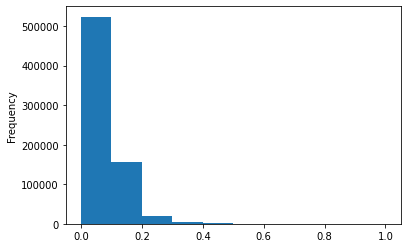

In [ ]:

#visualizing similarity metrics
Tanimoto[0].plot(kind='hist')
plt.show()

In [ ]:
df50=Tanimoto[Tanimoto[0]==0.5]
len(df50)#number of pair 50%similar

104

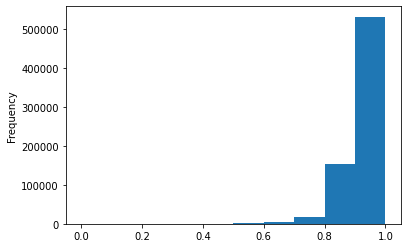

In [ ]:

#visualizing distance metrics
Tanimoto_dist[0].plot(kind='hist')
plt.show()

In [ ]:
File_name='Tanimoto similarity for merged data(non_duplicates).xlsx'

Tanimoto.to_excel(File_name)
files.download(File_name)

KeyboardInterrupt: ignored

In [ ]:
File_name='CID FILE.xlsx'

df1.to_excel(File_name)
files.download(File_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>